In [1]:
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

We seek to find the minimum value of the function $f(x)= 2 x sin(x^3) - x cos(x^3/12)$ on $[-2\pi,2\pi]$.

In [2]:
def f(x):
    y = 2*x*np.sin(x**3) - x*np.cos(x**3/12) 
    return y

In [3]:
lb=-2*np.pi
ub=2*np.pi
disc = 100000
v = np.linspace(lb,ub,disc)
print(f'lb = {lb:.5f}','&',f'ub = {ub:.4f}')
print(f'x_min = {v[np.argmin(f(v))]:.4f}','&',f'Min(f) = {np.min(f(v)):.4f}')

lb = -6.28319 & ub = 6.2832
x_min = 6.0789 & Min(f) = -18.1847


In [4]:
#Using Nelder Mead local search Algorithm
#%%time
x0 = v[np.argmin(f(v))]
bnds = ((lb, ub),)
res = minimize(f, x0, method='Nelder-Mead', tol=1e-9, bounds=bnds, options={'maxiter':1e11})
#print(f'x_min_opt = {res.x[0]:.4f}','&',f'Min(f)_opt = {res.fun:.4f}')

Minimum value of -18.18478 found for x = 6.07888.


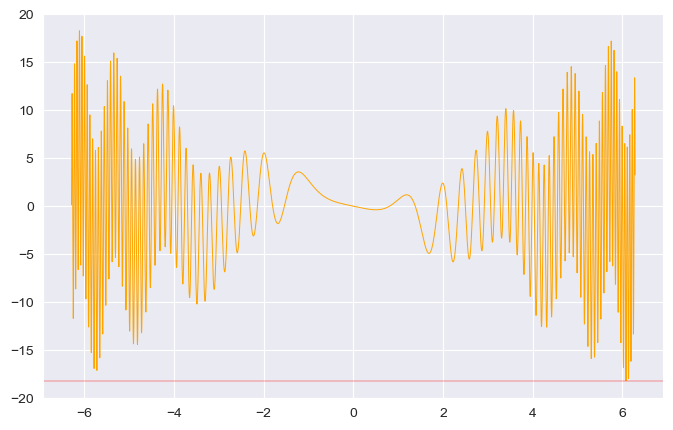

In [5]:
print(f'Minimum value of {res.fun:.5f}','found for', f'x = {res.x[0]:.5f}.')
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
g=sns.lineplot(x=v,y=f(v), linewidth = 0.7,color='orange');
g.axhline(res.fun,color='red',linewidth = 0.3);

In [6]:
#Using Differential Evolution global search Algorithm
#%%time
x0 = v[np.argmin(f(v))]
bnds = ((lb, ub),)
de = differential_evolution(f,x0=x0, bounds=bnds, maxiter=1000)
print(f'x_min_de = {de.x[0]:.4f}','&',f'Min(f)_de = {de.fun:.4f}')

x_min_de = 6.0789 & Min(f)_de = -18.1848


Wolfram Alpha solution:
https://www.wolframalpha.com/input?i=minimum+calculator&assumption=%7B%22F%22%2C+%22GlobalMinimizeCalculator%22%2C+%22curvefunction%22%7D+-%3E%222xsin%28x%5E3%29+-+xcos%28x%5E3%2F12%29%22&assumption=%7B%22F%22%2C+%22GlobalMinimizeCalculator%22%2C+%22domain%22%7D+-%3E%22-6.2832%3Cx%3C6.2832%22